In [3]:
import seaborn as sn
from trainer import Trainer
from dataset import V_DCASE
from CNN import CNN
import torch
from torch.utils.data import DataLoader
from path import Path
import numpy as np

In [16]:
dataset = V_DCASE(Path('./ADL_DCASE_DATA/evaluation'), 3)
loader = DataLoader(dataset, shuffle=False, batch_size=1)
model = CNN(3, dataset.get_num_clips())

model.load_state_dict(torch.load('./checkpoints/full/153_0.8615384615384616.pth', map_location=torch.device('cpu')))
# trainer = Trainer(model, None, loader, torch.nn.CrossEntropyLoss(), torch.optim.Adam(model.parameters(), lr=1e-2), None, torch.device('cpu'))

<All keys matched successfully>

In [17]:
def print_per_class_accuracy():
        classes = {0: 'beach',
                   1: 'bus',
                   2: 'cafe/restaurant',
                   3: 'car',
                   4: 'city_center',
                   5: 'forest_path',
                   6: 'grocery_store',
                   7: 'home',
                   8: 'library',
                   9: 'metro_station',
                  10: 'office',
                  11: 'park',
                  12: 'residential_area',
                  13: 'train',
                  14: 'tram'}

        correct_pred = {classname: 0 for classname in classes.keys()}
        incorrect_pred = {classname: {class_n: 0 for class_n in classes.keys()} for classname in classes.keys()}
        total_pred = {classname: 0 for classname in classes.keys()}

        model.eval()
        with torch.no_grad():
            
            validation_results = {
                'loss': [],
                'accuracy': [],
                'preds': [],
                'labels': []
            }
            
            for idx, (batch, labels) in enumerate(loader):
                
                logits = model(batch.to(torch.device('cpu')))
                preds = logits.argmax(-1).cpu().numpy()

                for label, pred in zip(labels.cpu().numpy(), preds):
                    if label == pred:
                        correct_pred[label] += 1
                        print(f'idx: {idx}, Thought ' + classes[label] + ' was ' + classes[pred])
                    else:
                        print(f'idx: {idx}, Thought ' + classes[label] + ' was ' + classes[pred])
#                         show_spectrogram(idx)
                    incorrect_pred[label][pred] += 1
                    total_pred[label] += 1
                    
                    
                validation_results['preds'].extend(list(preds))
                validation_results['labels'].extend(list(labels.numpy()))
                
        validation_results['accuracy'] = compute_accuracy(
            np.array(validation_results["labels"]), 
            np.array(validation_results["preds"])
        )
        
        
        print(validation_results['accuracy'])
                
        
        for classname, correct in correct_pred.items():
            accuracy = 100 * float(correct) / total_pred[classname]
            print("Accuracy for class {:5s} is: {:.1f}%".format(classes[classname], accuracy))
            
        return incorrect_pred
    
def compute_accuracy(
        preds,
        labels
    ) -> float:
        return float((labels == preds).sum()) / len(labels)
    
# def show_spectrogram(idx):
#     total_duration = 30
#     clip_len = 3
    
#     spec = torch.from_numpy(np.load(f'ADL_DCASE_DATA/evaluation/audio/{idx}.npy')) #residential area
#     time_steps = spec.size(-1)
#     num_clips = total_duration // clip_len
#     time_interval = int(time_steps // num_clips)
#     spec = spec[:, :time_interval]
#     plt.imshow(spec.numpy())

In [18]:
out = print_per_class_accuracy()

idx: 0, Thought bus was bus
idx: 1, Thought park was park
idx: 2, Thought forest_path was forest_path
idx: 3, Thought beach was beach
idx: 4, Thought park was park
idx: 5, Thought tram was tram
idx: 6, Thought library was library
idx: 7, Thought forest_path was forest_path
idx: 8, Thought cafe/restaurant was cafe/restaurant
idx: 9, Thought home was home
idx: 10, Thought tram was tram
idx: 11, Thought home was home
idx: 12, Thought park was park
idx: 13, Thought bus was bus
idx: 14, Thought residential_area was residential_area
idx: 15, Thought residential_area was residential_area
idx: 16, Thought residential_area was residential_area
idx: 17, Thought beach was beach
idx: 18, Thought beach was beach
idx: 19, Thought beach was beach
idx: 20, Thought train was cafe/restaurant
idx: 21, Thought grocery_store was grocery_store
idx: 22, Thought home was home
idx: 23, Thought forest_path was forest_path
idx: 24, Thought park was park
idx: 25, Thought bus was bus
idx: 26, Thought home was home

idx: 209, Thought city_center was city_center
idx: 210, Thought residential_area was residential_area
idx: 211, Thought grocery_store was grocery_store
idx: 212, Thought cafe/restaurant was cafe/restaurant
idx: 213, Thought car was car
idx: 214, Thought library was library
idx: 215, Thought city_center was park
idx: 216, Thought tram was tram
idx: 217, Thought train was cafe/restaurant
idx: 218, Thought park was park
idx: 219, Thought bus was bus
idx: 220, Thought home was home
idx: 221, Thought forest_path was forest_path
idx: 222, Thought bus was bus
idx: 223, Thought metro_station was metro_station
idx: 224, Thought car was car
idx: 225, Thought tram was beach
idx: 226, Thought office was office
idx: 227, Thought train was train
idx: 228, Thought cafe/restaurant was cafe/restaurant
idx: 229, Thought forest_path was forest_path
idx: 230, Thought car was car
idx: 231, Thought park was park
idx: 232, Thought train was train
idx: 233, Thought home was home
idx: 234, Thought beach was be

In [19]:
classes = {0: 'beach',
                   1: 'bus',
                   2: 'cafe/restaurant',
                   3: 'car',
                   4: 'city_center',
                   5: 'forest_path',
                   6: 'grocery_store',
                   7: 'home',
                   8: 'library',
                   9: 'metro_station',
                  10: 'office',
                  11: 'park',
                  12: 'residential_area',
                  13: 'train',
                  14: 'tram'}

class_list = list(classes.values())

lol = np.array([[x for x in y.values()] for y in out.values()])

In [20]:
lol

array([[23,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0, 24,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1],
       [ 0,  0, 17,  0,  0,  0,  4,  3,  0,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  0, 24,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 25,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 26,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 24,  2,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 24,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  5, 16,  0,  5,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  3,  0,  0, 23,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 26,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 22,  3,  1,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  5, 19,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 21,  1],
       [ 1,  1,  0,  0,  0,  0,  0

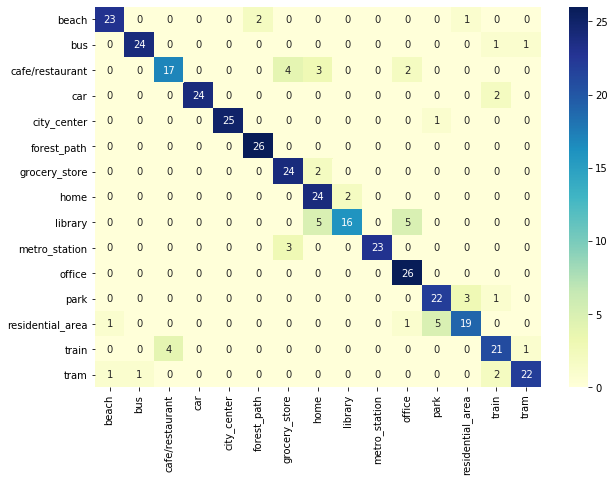

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(lol, index = [i for i in class_list],
                  columns = [i for i in class_list])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap="YlGnBu")

In [28]:
xd = dataset[20]

In [29]:
xd

(tensor([[[  3.7918,   4.1769,   3.3734,  ...,   2.5891,   4.0049,   4.0765],
          [  3.3568,   4.2748,   2.6210,  ...,   3.0096,   4.5512,   2.7049],
          [  0.8009,   2.7339,   2.4971,  ...,   1.6848,   3.9034,   3.3292],
          ...,
          [-12.9388, -13.4219, -13.7989,  ...,  -9.6656,  -6.7434,  -5.5218],
          [-13.5405, -14.1526, -14.7823,  ..., -11.3197,  -7.6124,  -6.5710],
          [-14.1168, -15.8895, -16.0121,  ..., -13.0632, -10.2688,  -9.2659]],
 
         [[  5.0405,   6.7737,   4.5152,  ...,   2.5905,   3.3248,   4.7117],
          [  5.6245,   7.6532,   5.0511,  ...,   1.5047,   0.7326,   3.4425],
          [  4.7190,   5.2359,   3.3130,  ...,   0.5390,  -0.3929,   0.1480],
          ...,
          [ -7.6341, -10.2551, -11.5571,  ..., -13.3401, -12.8755, -13.2736],
          [ -9.2653, -11.3818, -12.4793,  ..., -14.4754, -14.2267, -14.5317],
          [-11.3768, -13.4007, -13.1054,  ..., -16.3351, -14.8461, -15.6928]],
 
         [[  3.2271,   2.544